### Student Information
Name:陳庭葳

Student ID:111042005

GitHub ID:Harley-wyw

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import math
import PAMI
import umap
import seaborn as sns
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#import Newdata
df = pd.read_csv("C:/Users/vivia/Documents/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv")

In [9]:
#First see the structure of the data
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [10]:
#See the texts from the top 3 records. (Exercise 1)
for i in range(3):
    print(f"example {(i+1)}")
    print("\n".join(df["text"].iloc[i].split("\m")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [12]:
df_query = pd.DataFrame(df['text'].iloc[:10], index=df['sentiment'].iloc[:10], columns=['text'])
print(df)

        type             datetime  post_id         subreddit  \
0    comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1    comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2    comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3       post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4    comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
..       ...                  ...      ...               ...   
842  comment   2021-06-30 4:06:06  h3iv6pq  stockstobuytoday   
843  comment   2025-04-11 5:01:24  mmijiuz       StockMarket   
844     post  2025-03-24 12:30:39  1jipi4v  stockstobuytoday   
845  comment  2025-04-11 20:13:26  mmmely7    wallstreetbets   
846  comment   2025-04-12 3:09:06  mmobyz1    wallstreetbets   

                                                 title                author  \
0      Retardation is on the menu boys! WSB is so back          StickyTip420   
1    Retail giant TARGET has now declined for 10 co...  Comfortable-Dog

In [21]:
#fetch records belonging to "post" type, and query every 10th record and only show first 5 records. 
df[df["type"]=="post"][::10][0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,2025-04-09 14:01:01,1jv6i3y,stockstobuytoday,Established Uptrend,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,2025-04-11 18:25:25,1jwwv42,wallstreetbets,$75k+ In Gains (300% YTD),KatBoss01,https://www.reddit.com/gallery/1jwwv42,5,0.0,1.00,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,2025-03-31 14:05:30,1jo3zpc,stockstobuytoday,Stock Gainers for Today,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,2021-12-25 0:40:59,rnypxo,stockstobuytoday,Deep value vs Dividend!,AnonymusFarmer,https://www.reddit.com/r/stockstobuytoday/comm...,9,0.0,0.91,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


In [30]:
#create a dataframe consisting of columns that are necessary for my analysis.
columns = ["type", "datetime", "upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity", "sentiment", "text"]
my_df = df[columns]

In [23]:
#finding if there are missing values
print(my_df.isnull().apply(lambda x: dmh.check_missing_values(my_df), axis=1))
my_df.isnull().apply(lambda x: dmh.check_missing_values(my_df))

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object


,type,datetime,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0


In [8]:
my_df.isnull().sum()
my_df.dtypes

type             object
datetime         object
upvotes           int64
downvotes       float64
upvote_ratio    float64
subjectivity    float64
polarity        float64
sentiment       float64
dtype: object

In [9]:
#checking if there are duplicates
sum(my_df.duplicated())

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [11]:
#sample the data with 500 records at a random state
my_df_sample = my_df.sample(n=400)
my_df_sample.head()

,type,datetime,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment
175,comment,2025-03-02 1:47:17,1,NaN,NaN,0.200000,0.18,1.0
322,comment,2025-04-11 15:13:07,1,NaN,NaN,0.273333,-0.22,-1.0
457,comment,2025-04-11 15:42:58,1,NaN,NaN,0.000000,0.00,0.0
249,comment,2025-04-11 15:40:27,3,NaN,NaN,0.500000,-0.30,-1.0
326,comment,2025-04-12 1:51:01,59,NaN,NaN,0.100000,0.30,1.0


Axes(0.125,0.11;0.775x0.77)


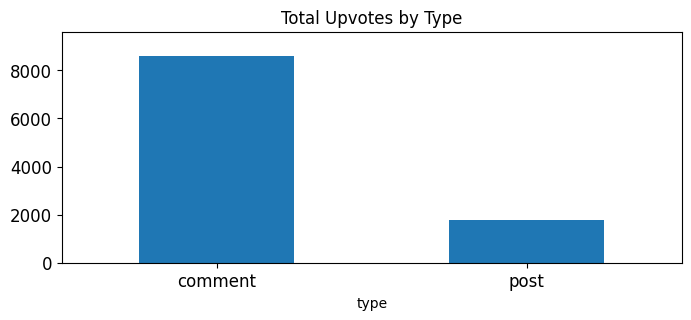

In [24]:
print(my_df.groupby("type")["upvotes"]
       .sum()
       .sort_values(ascending=False)
       .plot(kind="bar",
        title="Total Upvotes by Type",
        ylim=[0, df.groupby("type")["upvotes"].sum().max() + 1000],
        rot=0,
        fontsize=12,
        figsize=(8,3))
        )

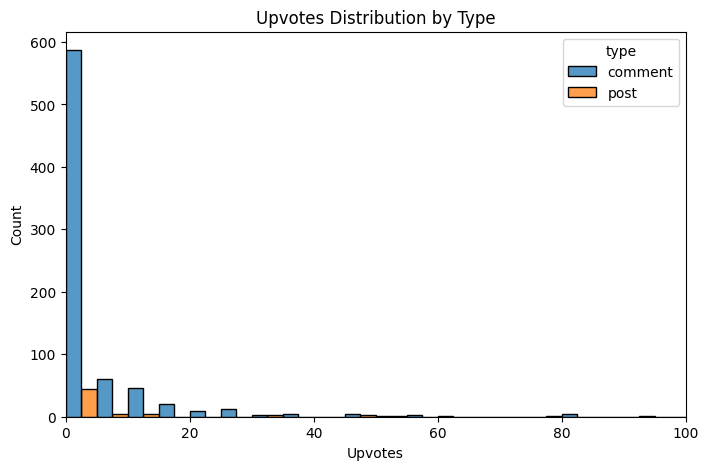

In [27]:
#make a plot of the upvotes counts of the two types 
plt.figure(figsize=(8,5))
bins = np.arange(0, 100 +5, 5)
sns.histplot(
    data=my_df,
    x="upvotes",
    hue="type",
    bins=bins,
    multiple="dodge",
    kde=False
)
plt.xlim(0,100)
plt.title("Upvotes Distribution by Type")
plt.xlabel("Upvotes")
plt.ylabel("Count")
plt.show()


In [34]:
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(my_df.text[0])

['calls', 'on', 'retards']

In [37]:
my_df_counts = count_vect.fit_transform(my_df.text)
my_df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [39]:
term_frequencies = []
for j in range(0,my_df_counts.shape[1]):
    term_frequencies.append(sum(my_df_counts[:,j].toarray()))
term_frequencies = np.asarray(my_df_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(4)

In [43]:
plt.subplots(figsize=(100,100))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

C:\Users\vivia\AppData\Local\Temp\ipykernel_26472\2906427359.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

C:\Users\vivia\Documents\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivia\Documents\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


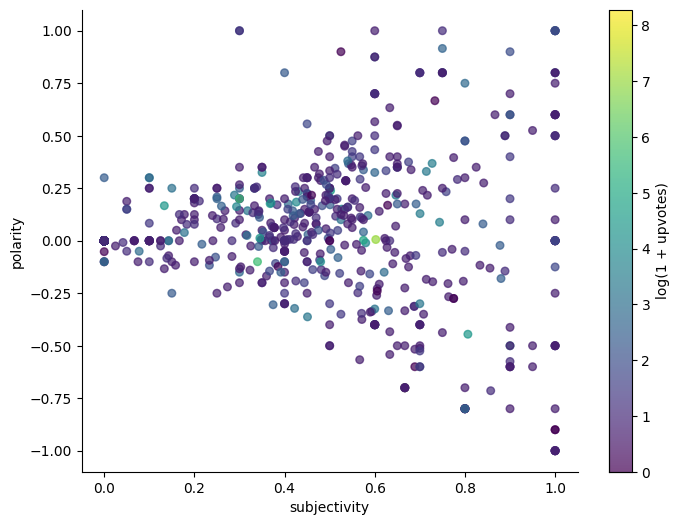

In [38]:

#make a scatter plot of the relationship between subjectivity, polarity, and upvotes counts log
plot_df = my_df[["subjectivity", "polarity", "upvotes"]].dropna().copy()
plot_df["upvotes_log"] = np.log1p(plot_df["upvotes"])

plt.figure(figsize=(8,6))
sc = plt.scatter(plot_df["subjectivity"], plot_df["polarity"],
                 c=plot_df["upvotes_log"], cmap="viridis", s=30, alpha=0.7)
plt.colorbar(sc, label="log(1 + upvotes)")
sns.despine()
plt.xlabel("subjectivity")
plt.ylabel("polarity")
plt.show()

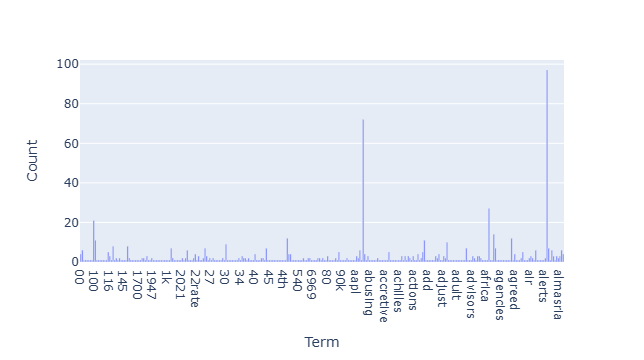

In [50]:
import plotly.express as px
words = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]
my_df_plot = pd.DataFrame({
    "word": words, 
    "frequencies": freqs
})
my_df_plot = my_df_plot[my_df_plot["frequencies"] > 0]
fig_plotly = px.bar(
    my_df_plot, 
    x="word",
    y="frequencies", 
    labels={"word": "Term", "frequencies": "Count"}
)
fig_plotly.show()

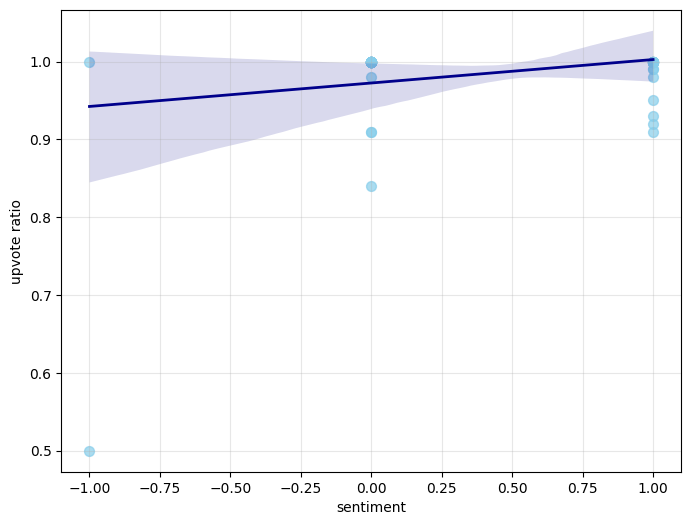

In [52]:
#use the 64 data of valiid upvote ratio and sentiment to make a scatter plot with a regression line to visualize the relationship
my_df_valid = my_df[["upvote_ratio", "sentiment"]].dropna().copy()
plt.figure(figsize = (8,6))
sns.regplot(data = my_df_valid, 
            x = "sentiment",
            y = "upvote_ratio",
            scatter_kws = {'alpha':0.7, 's':50, 'color':'skyblue'},
            line_kws={'color':'darkblue', 'lw':2}
           )
plt.xlabel("sentiment")
plt.ylabel("upvote ratio")
plt.grid(alpha=0.3)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here